<a href="https://colab.research.google.com/github/NithyaConnect/Product-Market-Segmentation-PCA-Regression-Analysis/blob/master/states_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [ ]:
path="/content/drive/MyDrive/State_wise_Health_income.csv"
df_test=pd.read_csv(path)
df=df_test.copy()

In [ ]:
#Missing Value Analysis
df.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'States', 'Health_indeces1', 'Health_indices2',
       'Per_capita_income', 'GDP'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


So, there are no missing values.

Let us perform some analysis of the data distribution.

In [ ]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)



In [ ]:
#checking nan values
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
df=df.dropna()


,States,Health_indeces1,Health_indices2,Per_capita_income,GDP


NAN values also 0

In [ ]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"seem to have {n_duplicates} duplicates in database.")


seem to have 0 duplicates in database.


#Treating bad values :

In [ ]:
df.loc[df['Health_indeces1'] == -10]


,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
35,Krastiltsi,-10,18,516,643


As 'Health_indeces1' have outliers we replace the value of median


In [ ]:
df.loc[df['Health_indeces1'] == -10]=df['Health_indeces1'].median()
df['Health_indeces1'].value_counts()

62      4
6430    2
119     2
2499    2
3276    2
       ..
568     1
592     1
229     1
3471    1
3463    1
Name: Health_indeces1, Length: 277, dtype: int64

In [ ]:
df

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22
...,...,...,...,...,...
292,Greencastle,3443,970,2499,238636
293,Greenisland,2963,793,1257,162831
294,Greyabbey,3276,609,1522,120184
295,Greysteel,3463,847,934,199403


#dropping categorical column "States"

In [ ]:
df.drop(["States"], axis=1,inplace=True)

Univariate analysis :

Health_indices2
Skew : -0.04


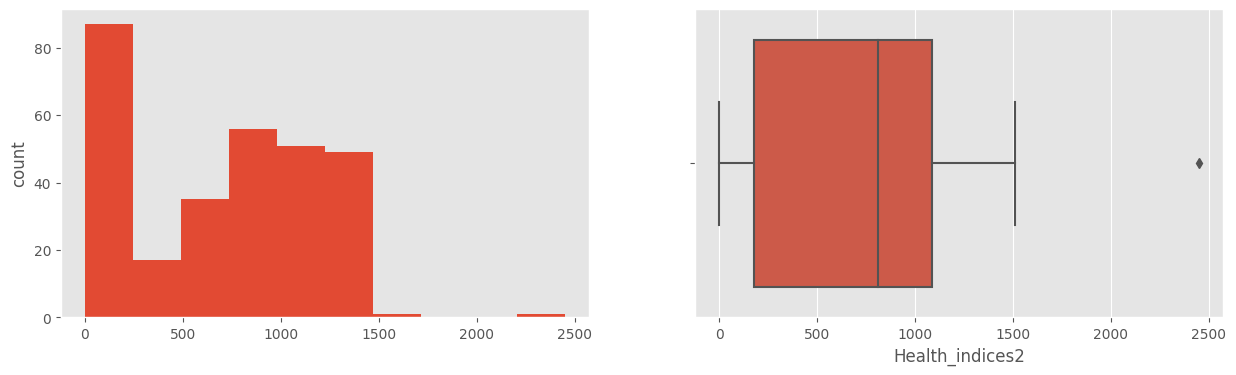

Per_capita_income
Skew : 0.82


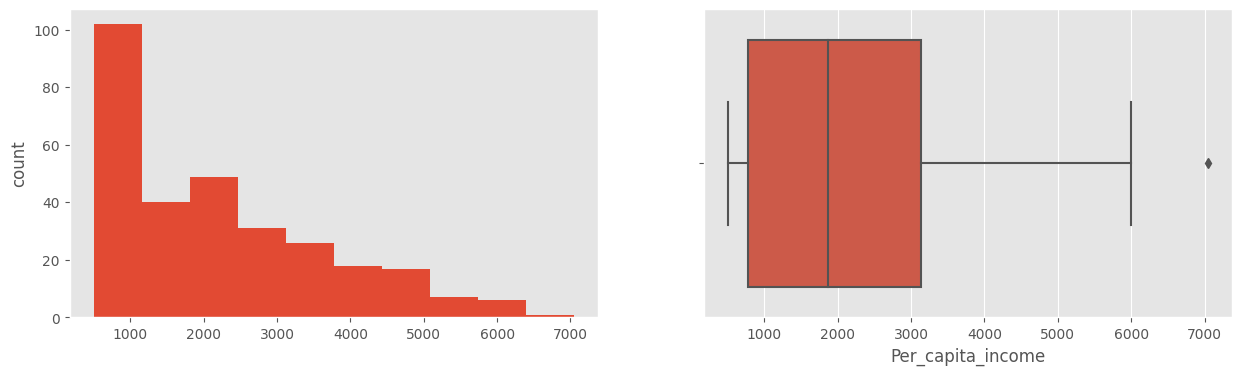

GDP
Skew : 0.83


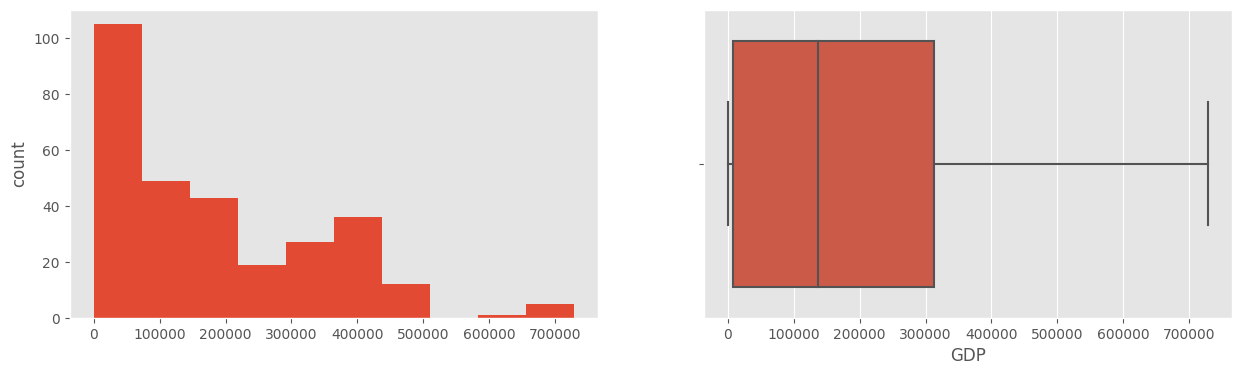

In [ ]:
for col in df.columns[1:]:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

Observations:

As observed earlier, most of the variables have skewed distributions
The distribution for Health_indices2 is relatively less skewed with fewer  outliers
The distribution for all other variables is highly skewed to the right. All these variables have some outliers to the right end.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indeces1    297 non-null    int64
 1   Health_indices2    297 non-null    int64
 2   Per_capita_income  297 non-null    int64
 3   GDP                297 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB


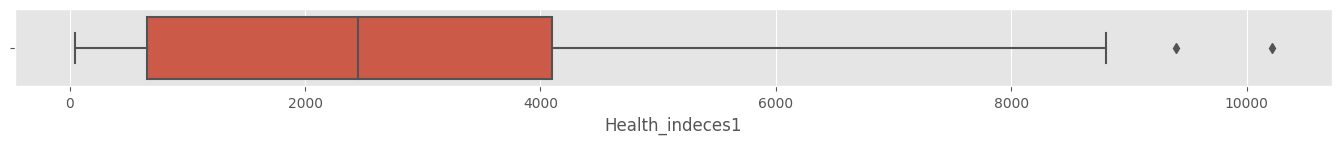

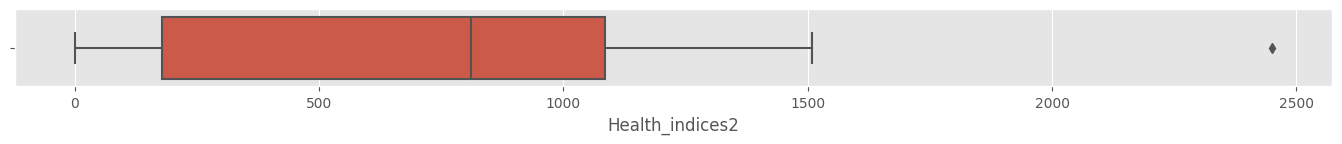

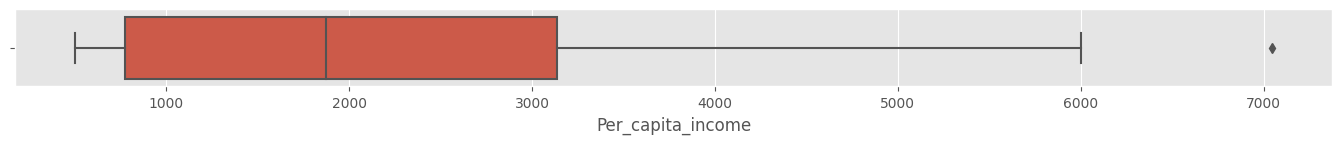

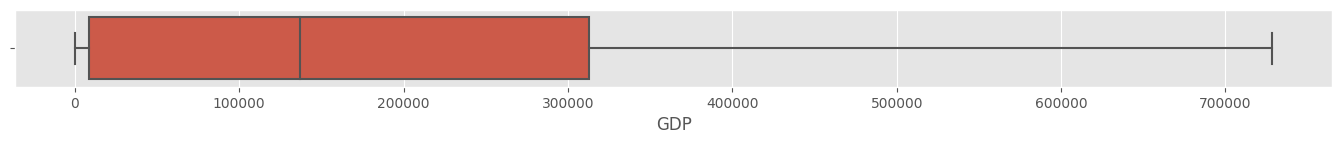

In [ ]:
#box plot of all columns
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [ ]:
#treating outliers:
def impute_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [ ]:
#capping outliers:

for column in df:
  lr,ur=impute_outlier(df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])
  df[column]=np.where(df[column]<lr,lr,df[column])

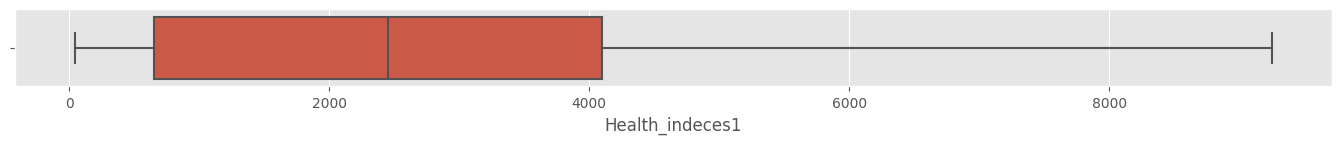

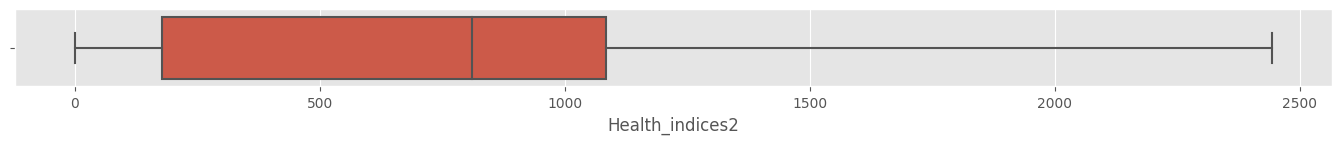

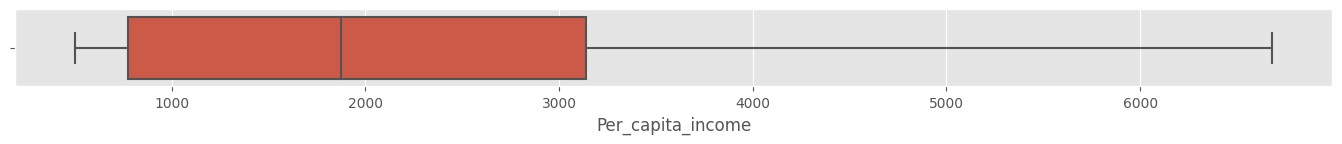

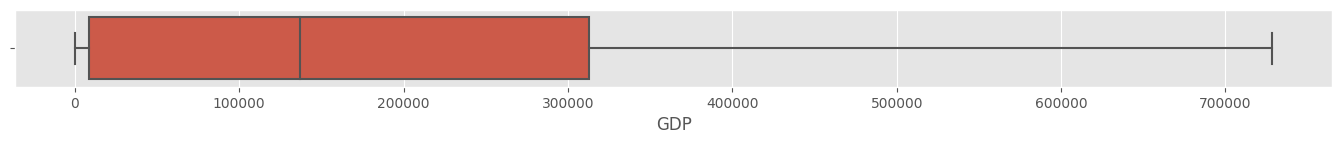

In [ ]:
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

# **Bivariate Analysis:**

###Now, let's begin Bi-variate Analysis. Here, we analyse 2 variables trying to find any relation between them

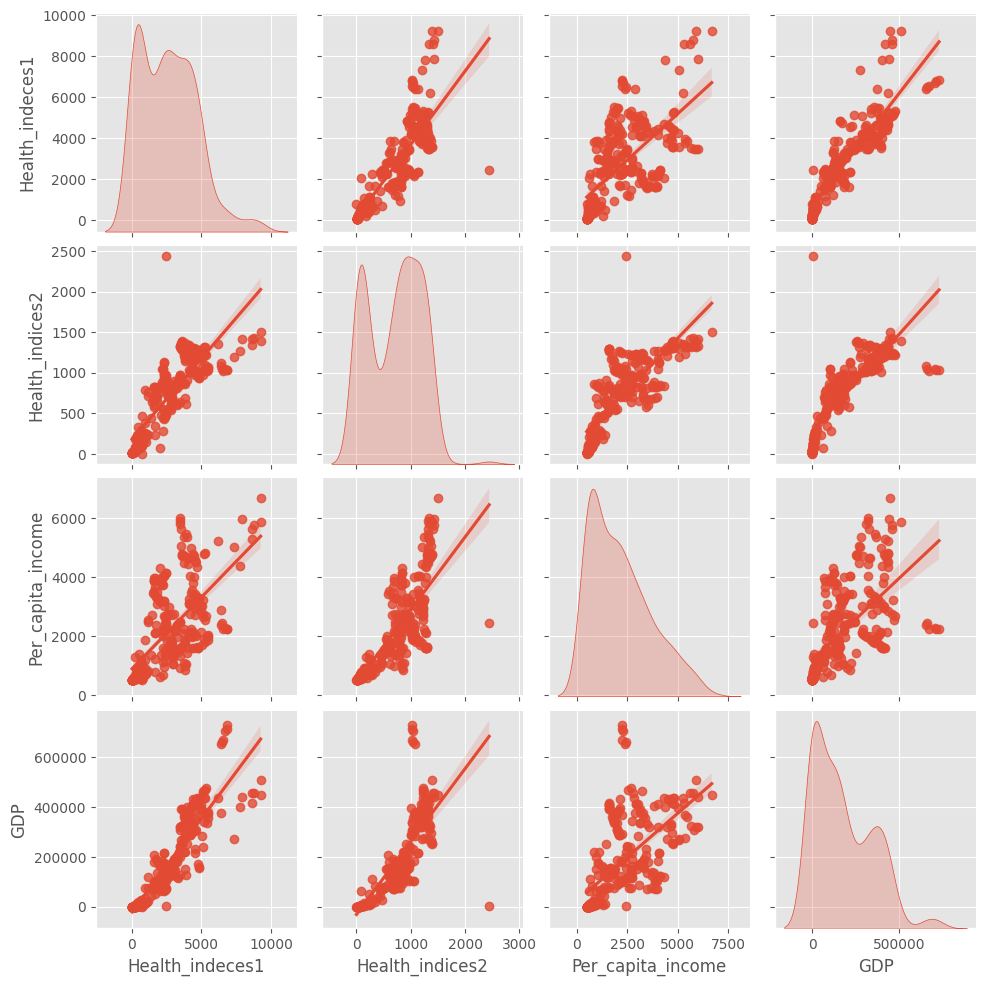

In [ ]:
sns.pairplot(data = df, kind='reg', diag_kind = 'kde')

Although we can say that there exists some relationship between variables, we can't tell quantify that from the above graphs.
So, let's quantify the amounts of correlation using Pearson Correlation and verify the above observations

<Axes: >

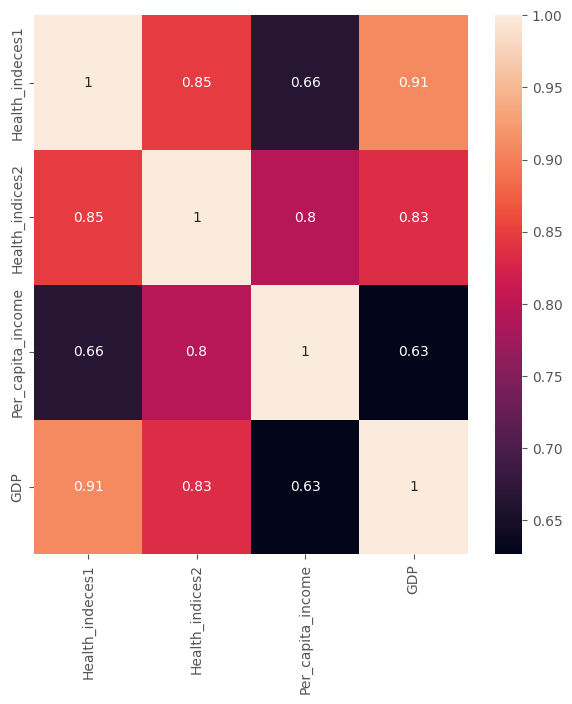

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

bservations:

There is a strong positive correlation between Health indices 1,Health indices 2 with Grp. This makes sense.
The per_capiata income have positive relationship with gdpp. This indicates that people live healthier in economocally settled stetes.


In [ ]:
df.drop(["GDP"], axis=1,inplace=True)

Scaling the data
Clustering algorithms are distance based algorithms and all distance based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.
We will drop the variables 'States' and "GDP" before scaling the data as we would not use these two variables for clustering the States.

In [ ]:
#scaling
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaled.describe()
X=df_scaled
Y=df_scaled


In [ ]:
#before sclaing
df.describe()

,Health_indeces1,Health_indices2,Per_capita_income
count,297.000000,297.000000,297.000000
mean,2634.686869,701.801347,2162.198653
std,2019.644675,478.173945,1484.974960
min,43.000000,0.000000,500.000000
25%,654.000000,179.000000,773.000000
50%,2451.000000,811.000000,1873.000000
75%,4094.000000,1085.000000,3137.000000
max,9254.000000,2444.000000,6683.000000


In [ ]:
#aftter scaling

df_scaled.describe()

,Health_indeces1,Health_indices2,Per_capita_income
count,2.970000e+02,2.970000e+02,2.970000e+02
mean,-4.784800e-17,4.784800e-17,4.784800e-17
std,1.001688e+00,1.001688e+00,1.001688e+00
min,-1.285405e+00,-1.470147e+00,-1.121234e+00
25%,-9.823658e-01,-1.095174e+00,-9.370820e-01
50%,-9.110359e-02,2.287514e-01,-1.950785e-01
75%,7.237789e-01,8.027317e-01,6.575509e-01
max,3.282996e+00,3.649590e+00,3.049500e+00


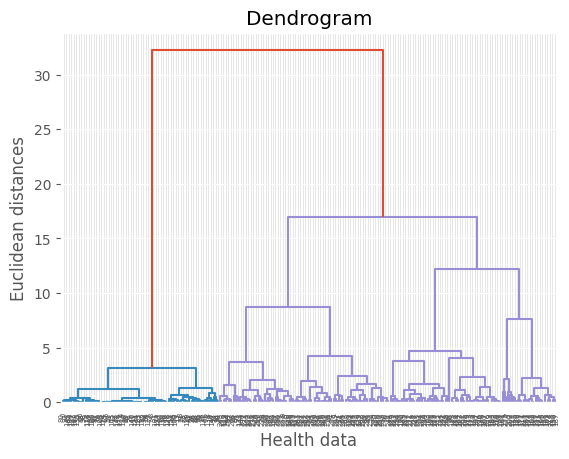

In [ ]:
 #Using the dendrogram to find the optimal numbers of clusters.

import scipy.cluster.hierarchy as sch

#Lets create a dendrogram variable
# linkage is actually the algorithm itself of hierarchical clustering and then in
#linkage we have to specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Health data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#selecting optimum number of clusters for kmeans


In [ ]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(Y)
    wss.append(KM.inertia_)
    labels = KM.predict(Y)
wss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[890.9999999999997,
 341.23166298910513,
 211.64847419423862,
 143.95169023356846,
 109.8212940392325,
 79.9121570980158,
 70.2813315357031,
 61.16423417959772,
 53.56675062331339,
 47.28933954595459]

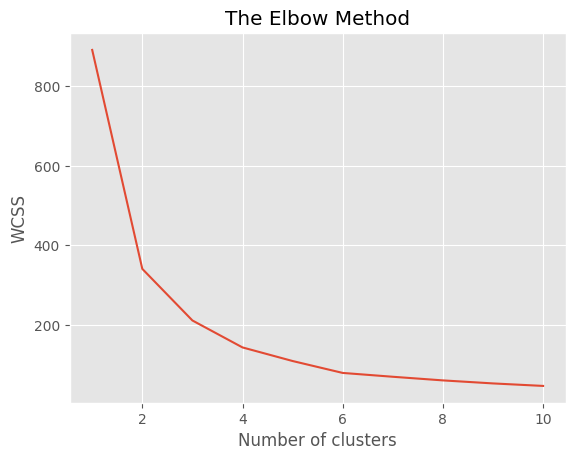

In [ ]:
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}
# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2,5):
    kmeans_s=KMeans(n_clusters=k, random_state=1).fit(Y)
    labels_s= kmeans_s.predict(Y)
    sc[k] = silhouette_score(Y, labels_s)
    print("sil s",sc[k] )

NameError: ignored

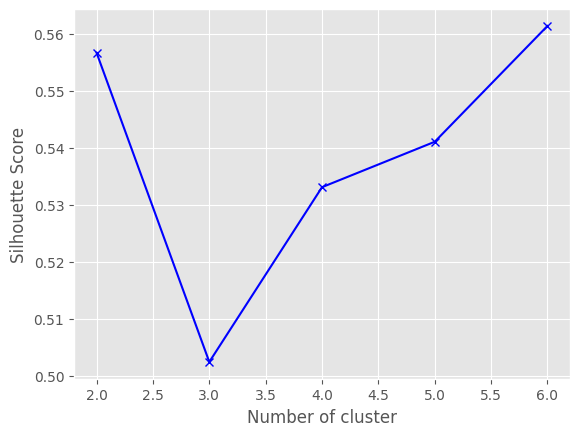

In [ ]:
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

bservations:

We can see from the plot that silhouette score is highest for k=3. Well that makes it slightly easy for us and we can start with first understanding these 3 clusters. So let's take the number of clusters as 3

In [ ]:
clust = KMeans(n_clusters = 3,random_state=1,max_iter=300,init='k-means++')
clust.fit_predict(Y)
labels=clust.labels_
df_test['KM_labels']=labels
df_test['KM_labels'].value_counts()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    130
2    101
1     66
Name: KM_labels, dtype: int64

Observations:

This looks like a very skewed clustering with a very few observations in one cluster and more than 100 in other. Let's check out the profiles of these clusters


In [ ]:
clust_profile=df_test
clust_summary=clust_profile.groupby('KM_labels').mean()
clust_summary



<ipython-input-107-25e9357fec3f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clust_summary=clust_profile.groupby('KM_labels').mean()


,Unnamed: 0,Health_indeces1,Health_indices2,Per_capita_income,GDP
KM_labels,,,,,
0,188.507692,3027.984615,871.400000,2325.023077,195274.184615
1,174.075758,5071.606061,1220.287879,4055.303030,385658.060606
2,78.821782,522.683168,120.673267,700.009901,10073.821782


In [ ]:
df.to_csv('clust_profile.csv')

In [ ]:
clust_summary=clust_profile.groupby('KM_labels').describe().T
clust_summary


KM_labels                            0              1              2
Unnamed: 0        count     130.000000      66.000000     101.000000
                  mean      188.507692     174.075758      78.821782
                  std        87.958521      54.229799      50.241297
                  min         1.000000       7.000000       0.000000
                  25%       117.750000     160.250000      38.000000
                  50%       211.500000     185.500000      80.000000
                  75%       263.750000     213.500000     116.000000
                  max       296.000000     235.000000     258.000000
Health_indeces1   count     130.000000      66.000000     101.000000
                  mean     3027.984615    5071.606061     522.683168
                  std      1082.895902    1702.428662     527.289369
                  min       947.000000     -10.000000      43.000000
                  25%      2251.000000    4090.250000     168.000000
                  50%      2860.000000    4577.500000     389.000000
                  75%      3796.250000    5313.250000     665.000000
                  max      5508.000000   10219.000000    2366.000000
Health_indices2   count     130.000000      66.000000     101.000000
                  mean      871.400000    1220.287879     120.673267
                  std       208.449745     197.085984     117.990517
                  min       475.000000      18.000000       0.000000
                  25%       707.250000    1168.250000      25.000000
                  50%       843.500000    1240.000000      81.000000
                  75%      1015.750000    1324.250000     181.000000
                  max      1294.000000    1508.000000     471.000000
Per_capita_income count     130.000000      66.000000     101.000000
                  mean     2325.023077    4055.303030     700.009901
                  std       853.421290    1267.713678     211.206699
                  min       858.000000     516.000000     500.000000
                  25%      1626.750000    3112.000000     548.000000
                  50%      2131.500000    4188.000000     619.000000
                  75%      2742.000000    4948.250000     781.000000
                  max      4311.000000    7049.000000    1395.000000
GDP               count     130.000000      66.000000     101.000000
                  mean   195274.184615  385658.060606   10073.821782
                  std    103411.525512  131589.533248   19285.062348
                  min     69924.000000     643.000000      22.000000
                  25%    120460.750000  319747.750000     272.000000
                  50%    156834.000000  386312.500000    2758.000000
                  75%    249553.500000  437603.750000    8942.000000
                  max    430971.000000  728575.000000  109755.000000

In [ ]:
df_test.columns


Index(['Unnamed: 0', 'States', 'Health_indeces1', 'Health_indices2',
       'Per_capita_income', 'GDP', 'KM_labels'],
      dtype='object')

In [ ]:
cols_visualise = []

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()